In [1]:
# Import pandas, numpy, and sys

import sys
import pandas as pd
import numpy as np
import math
import thinkstats2
import thinkplot
import statistics
import statsmodels.formula.api as smf
from scipy.stats import mode as scimode

In [2]:
# Import the csv file into a pandas dataframe named tempdf

tempdf = pd.read_csv('C:/Users/Christine/Documents/Bellevue/DSC_530/Project/temperatures.csv')

In [3]:
# Print the type and first 5 rows of the tempdf dataframe

print(type(tempdf))

tempdf.head()

<class 'pandas.core.frame.DataFrame'>


,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tempdf.tail()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6
130,2016,No Shadow,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4
131,1901-2000,NaN,33.82,22.5,32.9,26.5,41.50,32.3,42.4,35.9


In [5]:
# List the column names

tempdf.columns

Index(['Year', 'Punxsutawney Phil', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)'],
      dtype='object')

In [6]:
# Change the headers variables

tempdf.rename(columns = {'Year':'year','Punxsutawney Phil':'result', 'February Average Temperature':'feb_avg', 'February Average Temperature (Northeast)':'feb_avg_ne','February Average Temperature (Midwest)':'feb_avg_mw','February Average Temperature (Pennsylvania)':'feb_avg_pn','March Average Temperature':'mar_avg', 'March Average Temperature (Northeast)':'mar_avg_ne','March Average Temperature (Midwest)':'mar_avg_mw','March Average Temperature (Pennsylvania)':'mar_avg_pn'}, inplace=True)


In [7]:
# Confirm change to column names and print first 5 rows

tempdf.head()

,year,result,feb_avg,feb_avg_ne,feb_avg_mw,feb_avg_pn,mar_avg,mar_avg_ne,mar_avg_mw,mar_avg_pn
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Add a variable to convert results into numeric variable

def result_to_numeric(x):
    if x == 'No Record':
        return 4
    if x == 'No Shadow':
        return 0
    if x == 'Partial Shadow':
        return 1
    if x == 'Full Shadow':
        return 1
    
tempdf['result_num'] = tempdf['result'].apply(result_to_numeric)

In [9]:
# Confirm addition of variable and print first 5 rows

tempdf.head()

,year,result,feb_avg,feb_avg_ne,feb_avg_mw,feb_avg_pn,mar_avg,mar_avg_ne,mar_avg_mw,mar_avg_pn,result_num
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
# Create subset to omit NaN and No record variables

subtemp = tempdf[tempdf['result_num'] != 4.0]
temp = subtemp.dropna()

In [11]:
# Confirm changes to dataframe
temp.head()

,year,result,feb_avg,feb_avg_ne,feb_avg_mw,feb_avg_pn,mar_avg,mar_avg_ne,mar_avg_mw,mar_avg_pn,result_num
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0,1.0
14,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3,1.0
15,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1,1.0
17,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5,1.0
18,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0,1.0


In [12]:
temp.tail()

,year,result,feb_avg,feb_avg_ne,feb_avg_mw,feb_avg_pn,mar_avg,mar_avg_ne,mar_avg_mw,mar_avg_pn,result_num
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7,1.0
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9,0.0
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3,1.0
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6,1.0
130,2016,No Shadow,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4,0.0


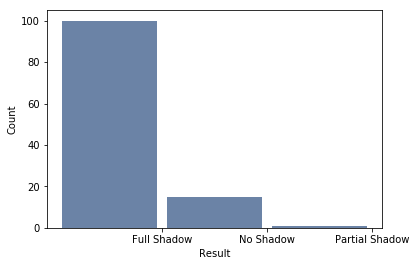

In [13]:
hist = thinkstats2.Hist(temp.result)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Result', ylabel='Count')

largest 5 =  [(41.41, 1), (40.1, 1), (39.81, 1), (39.78, 1), (39.7, 1)]
smallest 5 =  [(25.23, 1), (26.92, 1), (26.94, 1), (27.99, 1), (28.13, 1)]


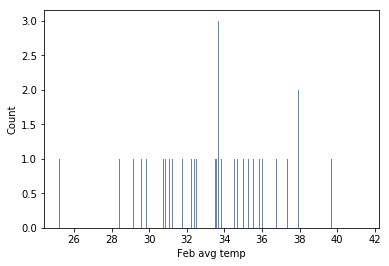

In [14]:
hist = thinkstats2.Hist(temp.feb_avg)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Feb avg temp', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))


largest 5 =  [(31.6, 1), (31.2, 1), (30.6, 1), (30.3, 1), (30.0, 1)]
smallest 5 =  [(10.4, 1), (12.1, 1), (13.9, 1), (14.5, 1), (15.0, 1)]


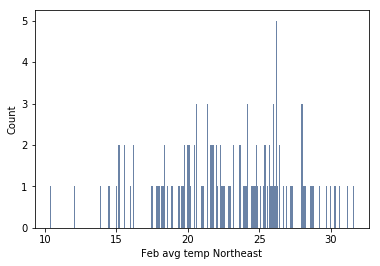

In [15]:
hist = thinkstats2.Hist(temp.feb_avg_ne)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Feb avg temp Northeast', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(41.4, 1), (41.1, 2), (41.0, 1), (40.9, 1), (40.4, 1)]
smallest 5 =  [(20.3, 1), (22.2, 1), (22.9, 1), (23.4, 1), (24.0, 1)]


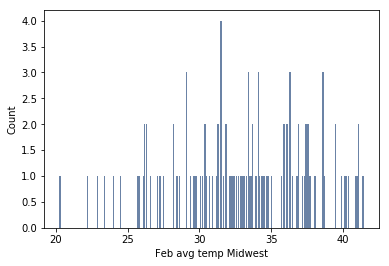

In [16]:
hist = thinkstats2.Hist(temp.feb_avg_mw)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Feb avg temp Midwest', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(35.8, 1), (34.3, 1), (33.9, 2), (33.8, 1), (33.6, 1)]
smallest 5 =  [(15.2, 1), (16.1, 1), (16.4, 1), (17.2, 1), (18.1, 1)]


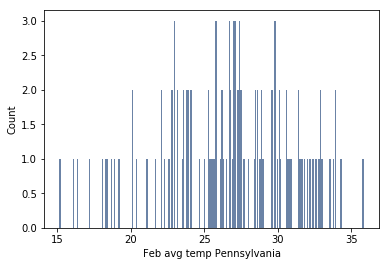

In [17]:
hist = thinkstats2.Hist(temp.feb_avg_pn)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Feb avg temp Pennsylvania', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(50.41, 1), (49.44, 1), (47.66, 1), (47.5, 1), (47.41, 1)]
smallest 5 =  [(35.44, 1), (35.76, 1), (35.91, 1), (36.03, 1), (36.1, 1)]


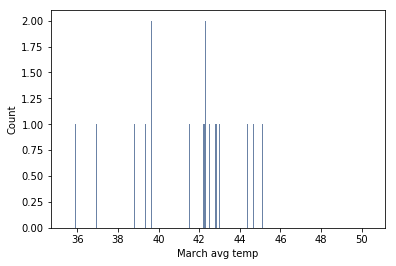

In [18]:
hist = thinkstats2.Hist(temp.mar_avg)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='March avg temp', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(43.4, 1), (41.6, 2), (40.6, 1), (40.4, 1), (39.6, 1)]
smallest 5 =  [(24.2, 2), (25.7, 1), (25.9, 1), (26.0, 2), (26.6, 1)]


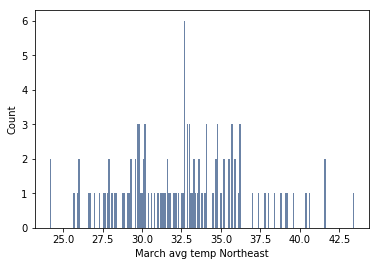

In [19]:
hist = thinkstats2.Hist(temp.mar_avg_ne)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='March avg temp Northeast', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(56.3, 1), (52.4, 1), (51.9, 2), (51.6, 1), (50.2, 1)]
smallest 5 =  [(28.5, 1), (33.9, 1), (34.8, 1), (34.9, 1), (35.1, 1)]


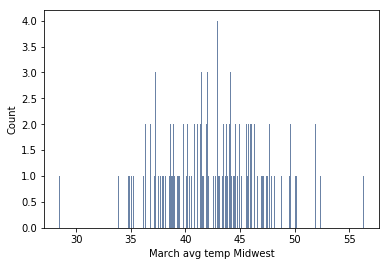

In [20]:
hist = thinkstats2.Hist(temp.mar_avg_mw)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='March avg temp Midwest', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

largest 5 =  [(47.7, 1), (46.2, 1), (45.4, 1), (45.3, 1), (44.5, 1)]
smallest 5 =  [(24.5, 1), (28.2, 1), (28.9, 1), (29.1, 1), (29.3, 1)]


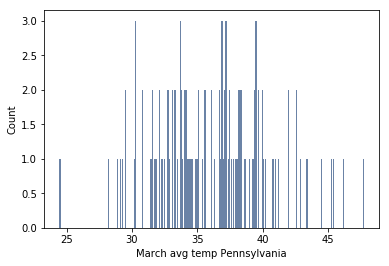

In [21]:
hist = thinkstats2.Hist(temp.mar_avg_pn)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='March avg temp Pennsylvania', ylabel='Count')
print("largest 5 = ", hist.Largest(5))
print("smallest 5 = ", hist.Smallest(5))

In [22]:
print('mean of feb avg temp = ', temp.feb_avg.mean())
print('mode of feb avg temp = ', scimode(temp.feb_avg))
print('variance of feb avg temp = ', temp.feb_avg.var())
print('std of feb avg temp = ', temp.feb_avg.std())

mean of feb avg temp =  33.928103448275856
mode of feb avg temp =  ModeResult(mode=array([33.69]), count=array([3]))
variance of feb avg temp =  10.157163328335832
std of feb avg temp =  3.1870304875127617


In [23]:
print('mean of mar avg temp = ', temp.mar_avg.mean())
print('mode of mar avg temp = ', scimode(temp.mar_avg))
print('variance of mar avg temp = ', temp.mar_avg.var())
print('std of mar avg temp = ', temp.mar_avg.std())

mean of mar avg temp =  41.834310344827585
mode of mar avg temp =  ModeResult(mode=array([38.5]), count=array([2]))
variance of mar avg temp =  8.677934302848577
std of mar avg temp =  2.945833380021446


In [24]:
print('mean of feb avg temp of ne = ', temp.feb_avg_ne.mean())
print('mode of feb avg temp of ne = ', scimode(temp.feb_avg_ne))
print('variance of feb avg temp of ne = ', temp.feb_avg_ne.var())
print('std of feb avg temp of ne = ', temp.feb_avg_ne.std())

mean of feb avg temp of ne =  22.80258620689654
mode of feb avg temp of ne =  ModeResult(mode=array([26.2]), count=array([5]))
variance of feb avg temp of ne =  18.5892976011994
std of feb avg temp of ne =  4.311530772382287


In [25]:
print('mean of mar avg temp of ne = ', temp.mar_avg_ne.mean())
print('mode of mar avg temp of ne = ', scimode(temp.mar_avg_ne))
print('variance of mar avg temp of ne = ', temp.mar_avg_ne.var())
print('std of mar avg temp of ne = ', temp.mar_avg_ne.std())

mean of mar avg temp of ne =  32.47499999999998
mode of mar avg temp of ne =  ModeResult(mode=array([32.7]), count=array([6]))
variance of mar avg temp of ne =  14.966239130434786
std of mar avg temp of ne =  3.868622381473124


In [26]:
print('mean of feb avg temp of mw = ', temp.feb_avg_mw.mean())
print('mode of feb avg temp of mw = ', scimode(temp.feb_avg_mw))
print('variance of feb avg temp of mw = ', temp.feb_avg_mw.var())
print('std of feb avg temp of mw  = ', temp.feb_avg_mw.std())

mean of feb avg temp of mw =  32.90862068965518
mode of feb avg temp of mw =  ModeResult(mode=array([31.5]), count=array([4]))
variance of feb avg temp of mw =  22.05035982008996
std of feb avg temp of mw  =  4.695781066030438


In [27]:
print('mean of mar avg temp of mw = ', temp.mar_avg_mw.mean())
print('mode of mar avg temp of mw = ', scimode(temp.mar_avg_mw))
print('variance of mar avg temp of mw = ', temp.mar_avg_mw.var())
print('std of mar avg temp of mw = ', temp.mar_avg_mw.std())

mean of mar avg temp of mw =  42.68534482758621
mode of mar avg temp of mw =  ModeResult(mode=array([42.9]), count=array([4]))
variance of mar avg temp of mw =  20.744392053973016
std of mar avg temp of mw =  4.554601195930662


In [28]:
print('mean of feb avg temp of pn = ', temp.feb_avg_pn.mean())
print('mode of feb avg temp of pn = ', scimode(temp.feb_avg_pn))
print('variance of feb avg temp of pn = ', temp.feb_avg_pn.var())
print('std of feb avg temp of pn  = ', temp.feb_avg_pn.std())

mean of feb avg temp of pn =  26.687068965517252
mode of feb avg temp of pn =  ModeResult(mode=array([23.]), count=array([3]))
variance of feb avg temp of pn =  20.122526986506752
std of feb avg temp of pn  =  4.485813971455655


In [29]:
print('mean of mar avg temp of pn = ', temp.mar_avg_pn.mean())
print('mode of mar avg temp of pn = ', scimode(temp.mar_avg_pn))
print('variance of mar avg temp of pn = ', temp.mar_avg_pn.var())
print('std of mar avg temp of pn = ', temp.mar_avg_pn.std())

mean of mar avg temp of pn =  36.01120689655171
mode of mar avg temp of pn =  ModeResult(mode=array([30.3]), count=array([3]))
variance of mar avg temp of pn =  17.746916791604203
std of mar avg temp of pn =  4.212708961179755


In [30]:
# Create dataframes for no shadow and partial/full shadow results

no_shadow = temp[temp.result_num == 0]
print(len(no_shadow))
shadow = temp[temp.result_num == 1]
print(len(shadow))

15
101


In [31]:
# Create functions for PMF and CDF functions and plots


def pmfunc(noshadowtemp, shadowtemp):
    """Creates PMF and their plots.

    noshadowtemp: avg temp for no shadow results
    shadowtemp: avg gemp for partial or full shadow
    """

    # Create PMF comparing no shadow to partial/full shadow
    no_pmf = thinkstats2.Pmf(noshadowtemp)
    full_pmf = thinkstats2.Pmf(shadowtemp)
    print('No shadow pmf results = ', no_pmf)
    print('Full or partial shadow pmf results = ', full_pmf)
   
    # Plot pmfs
    thinkplot.PrePlot(2)
    #thinkplot.SubPlot(2)
    thinkplot.Pmfs([no_pmf, full_pmf])
    thinkplot.Show(xlabel = 'temperature', ylabel = 'pmf')
    

def cdfnoshad(noshadowtemp):
    """Creates CDF and plot for no shadow results.

    noshadowtemp: avg temp for no shadow results
    """
    no_cdf = thinkstats2.Cdf(noshadowtemp, label = 'no shadow temps')
    thinkplot.Cdf(no_cdf)
    thinkplot.Config(xlabel = 'no shadow temps', ylabel = 'CDF')
    
def cdfshad(shadowtemp):
    """Creates CDF and plot for full/partial shadow results.

    shadowtemp: avg temp for partial or full shadow
    """
    full_cdf = thinkstats2.Cdf(shadowtemp, label = 'shadow temps')
    thinkplot.Cdf(full_cdf)
    thinkplot.Config(xlabel = 'shadow temps', ylabel = "CDF")
        
 

No shadow pmf results =  Pmf({36.05: 0.06666666666666667, 37.36: 0.06666666666666667, 35.35: 0.06666666666666667, 36.7: 0.06666666666666667, 35.55: 0.06666666666666667, 34.32: 0.06666666666666667, 33.69: 0.06666666666666667, 35.85: 0.06666666666666667, 33.04: 0.06666666666666667, 32.41: 0.06666666666666667, 39.47: 0.06666666666666667, 34.77: 0.06666666666666667, 36.86: 0.06666666666666667, 39.49: 0.06666666666666667, 32.76: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({37.38: 0.019801980198019802, 33.69: 0.019801980198019802, 37.94: 0.019801980198019802, 35.46: 0.019801980198019802, 34.7: 0.009900990099009901, 31.95: 0.009900990099009901, 34.34: 0.009900990099009901, 29.57: 0.009900990099009901, 34.12: 0.009900990099009901, 33.66: 0.009900990099009901, 36.9: 0.009900990099009901, 29.3: 0.009900990099009901, 31.8: 0.009900990099009901, 28.42: 0.009900990099009901, 27.99: 0.009900990099009901, 26.94: 0.009900990099009901, 33.57: 0.009900990099009901, 37.9: 0.0099009900

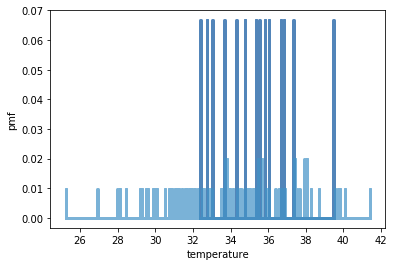

<Figure size 576x432 with 0 Axes>

In [32]:
pmfunc(no_shadow.feb_avg, shadow.feb_avg)

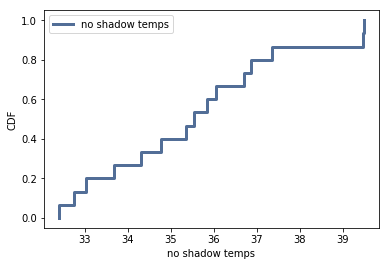

In [33]:
cdfnoshad(no_shadow.feb_avg)

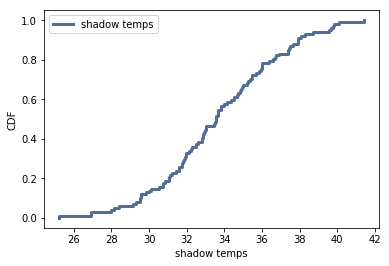

In [34]:
cdfshad(shadow.feb_avg)

No shadow pmf results =  Pmf({42.4: 0.13333333333333333, 38.84: 0.06666666666666667, 44.67: 0.06666666666666667, 38.7: 0.06666666666666667, 42.8: 0.06666666666666667, 43.07: 0.06666666666666667, 46.18: 0.06666666666666667, 40.91: 0.06666666666666667, 42.78: 0.06666666666666667, 43.34: 0.06666666666666667, 47.66: 0.06666666666666667, 44.74: 0.06666666666666667, 47.5: 0.06666666666666667, 38.5: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({40.75: 0.019801980198019802, 41.27: 0.019801980198019802, 41.31: 0.019801980198019802, 39.65: 0.019801980198019802, 38.71: 0.019801980198019802, 42.31: 0.019801980198019802, 43.56: 0.019801980198019802, 40.41: 0.009900990099009901, 46.63: 0.009900990099009901, 45.12: 0.009900990099009901, 43.18: 0.009900990099009901, 37.36: 0.009900990099009901, 42.51: 0.009900990099009901, 40.89: 0.009900990099009901, 42.62: 0.009900990099009901, 43.32: 0.009900990099009901, 37.9: 0.009900990099009901, 36.1: 0.009900990099009901, 38.84: 0.0099009900

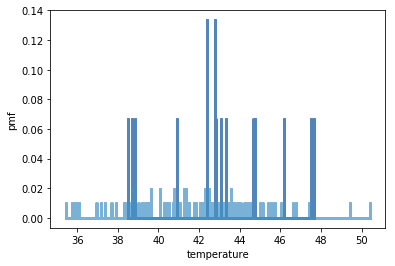

<Figure size 576x432 with 0 Axes>

In [35]:
pmfunc(no_shadow.mar_avg, shadow.mar_avg)


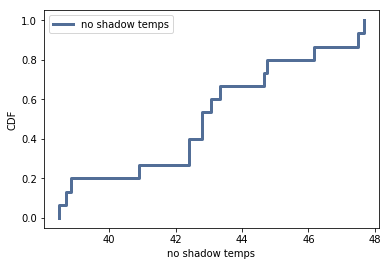

In [36]:
cdfnoshad(no_shadow.mar_avg)

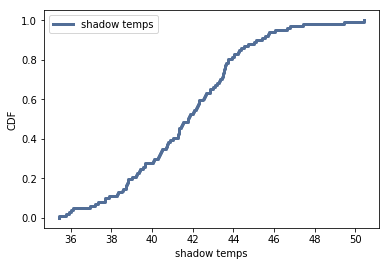

In [37]:
cdfshad(shadow.mar_avg)

No shadow pmf results =  Pmf({28.1: 0.06666666666666667, 28.2: 0.06666666666666667, 10.4: 0.06666666666666667, 21.6: 0.06666666666666667, 26.2: 0.06666666666666667, 28.6: 0.06666666666666667, 24.7: 0.06666666666666667, 20.6: 0.06666666666666667, 22.3: 0.06666666666666667, 23.7: 0.06666666666666667, 24.1: 0.06666666666666667, 25.3: 0.06666666666666667, 18.0: 0.06666666666666667, 28.0: 0.06666666666666667, 22.5: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({26.2: 0.039603960396039604, 24.2: 0.0297029702970297, 26.0: 0.0297029702970297, 21.4: 0.0297029702970297, 26.4: 0.019801980198019802, 21.8: 0.019801980198019802, 24.8: 0.019801980198019802, 16.2: 0.019801980198019802, 19.8: 0.019801980198019802, 21.7: 0.019801980198019802, 25.7: 0.019801980198019802, 20.6: 0.019801980198019802, 15.6: 0.019801980198019802, 15.2: 0.019801980198019802, 18.4: 0.019801980198019802, 23.6: 0.019801980198019802, 20.1: 0.019801980198019802, 28.0: 0.019801980198019802, 25.4: 0.019801980198019

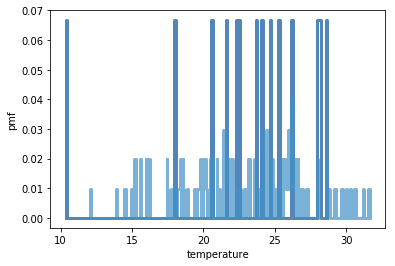

<Figure size 576x432 with 0 Axes>

In [38]:
pmfunc(no_shadow.feb_avg_ne, shadow.feb_avg_ne)

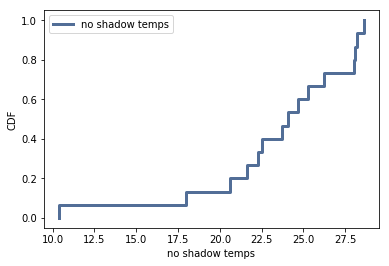

In [39]:
cdfnoshad(no_shadow.feb_avg_ne)

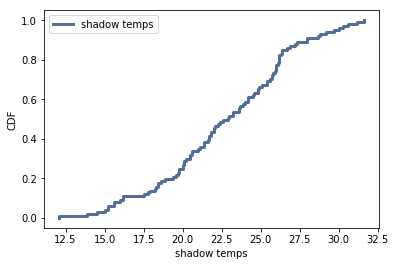

In [40]:
cdfshad(shadow.feb_avg_ne)

No shadow pmf results =  Pmf({32.7: 0.13333333333333333, 35.7: 0.13333333333333333, 33.0: 0.13333333333333333, 38.8: 0.06666666666666667, 33.2: 0.06666666666666667, 27.3: 0.06666666666666667, 29.2: 0.06666666666666667, 29.8: 0.06666666666666667, 36.2: 0.06666666666666667, 30.4: 0.06666666666666667, 32.1: 0.06666666666666667, 34.7: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({32.7: 0.039603960396039604, 30.2: 0.0297029702970297, 34.8: 0.0297029702970297, 29.7: 0.0297029702970297, 34.1: 0.0297029702970297, 32.9: 0.0297029702970297, 29.8: 0.019801980198019802, 35.9: 0.019801980198019802, 29.6: 0.019801980198019802, 41.6: 0.019801980198019802, 30.1: 0.019801980198019802, 24.2: 0.019801980198019802, 35.5: 0.019801980198019802, 29.3: 0.019801980198019802, 33.3: 0.019801980198019802, 27.9: 0.019801980198019802, 36.2: 0.019801980198019802, 33.6: 0.019801980198019802, 26.0: 0.019801980198019802, 35.2: 0.019801980198019802, 31.6: 0.019801980198019802, 29.1: 0.0099009900990099

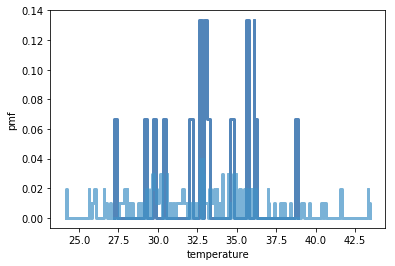

<Figure size 576x432 with 0 Axes>

In [41]:
pmfunc(no_shadow.mar_avg_ne, shadow.mar_avg_ne)

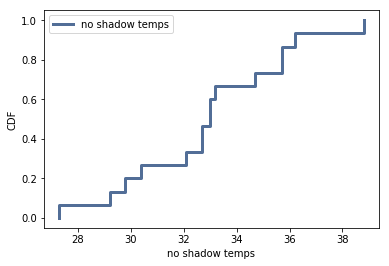

In [42]:
cdfnoshad(no_shadow.mar_avg_ne)

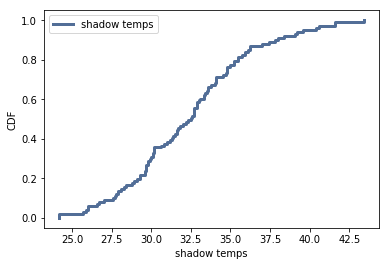

In [43]:
cdfshad(shadow.mar_avg_ne)

No shadow pmf results =  Pmf({33.4: 0.06666666666666667, 30.4: 0.06666666666666667, 34.4: 0.06666666666666667, 31.3: 0.06666666666666667, 37.7: 0.06666666666666667, 34.3: 0.06666666666666667, 35.9: 0.06666666666666667, 34.7: 0.06666666666666667, 27.2: 0.06666666666666667, 26.1: 0.06666666666666667, 32.6: 0.06666666666666667, 39.9: 0.06666666666666667, 36.9: 0.06666666666666667, 39.5: 0.06666666666666667, 33.5: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({31.5: 0.039603960396039604, 36.3: 0.0297029702970297, 34.1: 0.0297029702970297, 29.1: 0.0297029702970297, 38.6: 0.0297029702970297, 31.8: 0.019801980198019802, 36.1: 0.019801980198019802, 37.6: 0.019801980198019802, 26.2: 0.019801980198019802, 33.7: 0.019801980198019802, 31.9: 0.019801980198019802, 37.4: 0.019801980198019802, 33.4: 0.019801980198019802, 28.2: 0.019801980198019802, 37.5: 0.019801980198019802, 41.1: 0.019801980198019802, 26.3: 0.019801980198019802, 35.9: 0.009900990099009901, 32.4: 0.00990099009900990

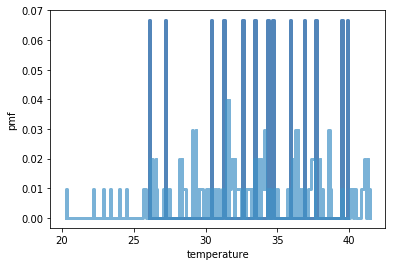

<Figure size 576x432 with 0 Axes>

In [44]:
pmfunc(no_shadow.feb_avg_mw, shadow.feb_avg_mw)

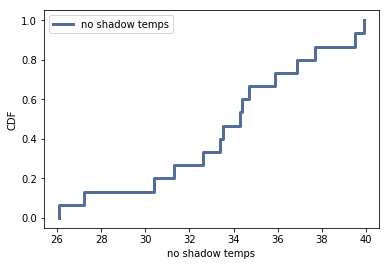

In [45]:
cdfnoshad(no_shadow.feb_avg_mw)

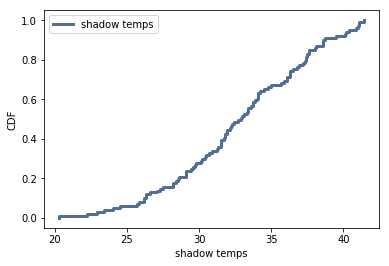

In [46]:
cdfshad(shadow.feb_avg_mw)

No shadow pmf results =  Pmf({45.6: 0.06666666666666667, 37.3: 0.06666666666666667, 45.8: 0.06666666666666667, 38.8: 0.06666666666666667, 38.7: 0.06666666666666667, 39.8: 0.06666666666666667, 50.1: 0.06666666666666667, 44.2: 0.06666666666666667, 46.6: 0.06666666666666667, 38.9: 0.06666666666666667, 38.6: 0.06666666666666667, 49.5: 0.06666666666666667, 43.0: 0.06666666666666667, 45.0: 0.06666666666666667, 43.5: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({42.9: 0.039603960396039604, 44.1: 0.0297029702970297, 42.0: 0.0297029702970297, 41.5: 0.0297029702970297, 46.0: 0.019801980198019802, 43.8: 0.019801980198019802, 36.8: 0.019801980198019802, 40.8: 0.019801980198019802, 44.0: 0.019801980198019802, 36.3: 0.019801980198019802, 37.3: 0.019801980198019802, 46.1: 0.019801980198019802, 40.2: 0.019801980198019802, 41.9: 0.019801980198019802, 41.4: 0.019801980198019802, 46.3: 0.019801980198019802, 47.7: 0.019801980198019802, 44.6: 0.019801980198019802, 51.9: 0.019801980198019

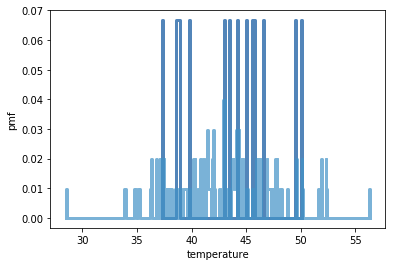

<Figure size 576x432 with 0 Axes>

In [47]:
pmfunc(no_shadow.mar_avg_mw, shadow.mar_avg_mw)

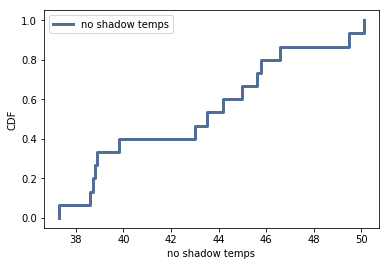

In [48]:
cdfnoshad(no_shadow.mar_avg_mw)

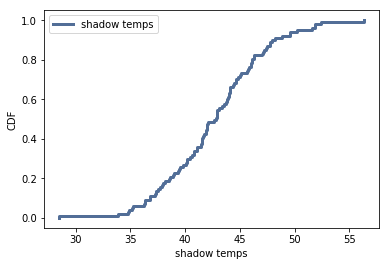

In [49]:
cdfshad(shadow.mar_avg_mw)

No shadow pmf results =  Pmf({27.4: 0.13333333333333333, 30.8: 0.06666666666666667, 23.9: 0.06666666666666667, 25.3: 0.06666666666666667, 20.1: 0.06666666666666667, 15.2: 0.06666666666666667, 31.7: 0.06666666666666667, 26.8: 0.06666666666666667, 28.6: 0.06666666666666667, 26.7: 0.06666666666666667, 28.8: 0.06666666666666667, 33.9: 0.06666666666666667, 29.8: 0.06666666666666667, 33.0: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({27.0: 0.0297029702970297, 23.0: 0.0297029702970297, 25.8: 0.0297029702970297, 27.1: 0.0297029702970297, 26.2: 0.019801980198019802, 27.3: 0.019801980198019802, 30.6: 0.019801980198019802, 30.1: 0.019801980198019802, 24.1: 0.019801980198019802, 23.6: 0.019801980198019802, 23.2: 0.019801980198019802, 29.8: 0.019801980198019802, 22.8: 0.019801980198019802, 22.1: 0.019801980198019802, 26.7: 0.019801980198019802, 23.8: 0.019801980198019802, 31.4: 0.019801980198019802, 32.9: 0.019801980198019802, 27.5: 0.019801980198019802, 28.9: 0.0198019801980198

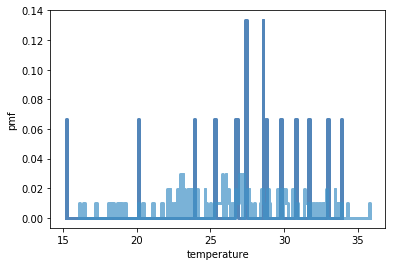

<Figure size 576x432 with 0 Axes>

In [50]:
pmfunc(no_shadow.feb_avg_pn, shadow.feb_avg_pn)

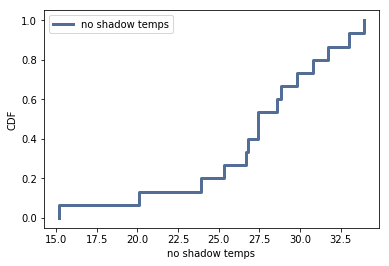

In [51]:
cdfnoshad(no_shadow.feb_avg_pn)

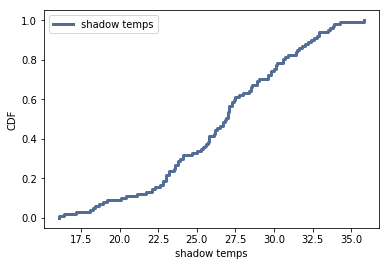

In [52]:
cdfshad(shadow.feb_avg_pn)

No shadow pmf results =  Pmf({31.6: 0.06666666666666667, 32.1: 0.06666666666666667, 33.7: 0.06666666666666667, 36.3: 0.06666666666666667, 43.4: 0.06666666666666667, 39.7: 0.06666666666666667, 40.2: 0.06666666666666667, 33.9: 0.06666666666666667, 34.2: 0.06666666666666667, 37.6: 0.06666666666666667, 37.4: 0.06666666666666667, 38.7: 0.06666666666666667, 30.8: 0.06666666666666667, 37.2: 0.06666666666666667, 38.0: 0.06666666666666667})
Full or partial shadow pmf results =  Pmf({36.9: 0.0297029702970297, 39.5: 0.0297029702970297, 30.3: 0.0297029702970297, 42.0: 0.019801980198019802, 32.8: 0.019801980198019802, 39.4: 0.019801980198019802, 33.7: 0.019801980198019802, 36.1: 0.019801980198019802, 38.4: 0.019801980198019802, 33.1: 0.019801980198019802, 33.8: 0.019801980198019802, 33.3: 0.019801980198019802, 37.5: 0.019801980198019802, 32.7: 0.019801980198019802, 29.5: 0.019801980198019802, 42.6: 0.019801980198019802, 35.6: 0.019801980198019802, 38.3: 0.019801980198019802, 34.1: 0.019801980198019

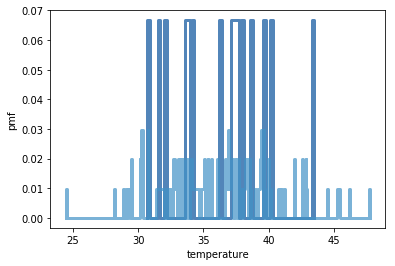

<Figure size 576x432 with 0 Axes>

In [53]:
pmfunc(no_shadow.mar_avg_pn, shadow.mar_avg_pn)

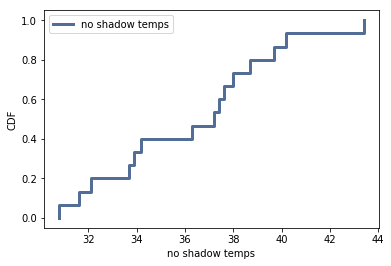

In [54]:
cdfnoshad(no_shadow.mar_avg_pn)

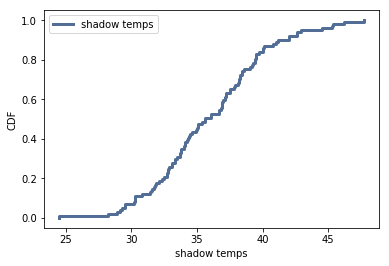

In [55]:
cdfshad(shadow.mar_avg_pn)

In [56]:
def MakeNormalPlot(temps):
    """Generates a normal probability plot of temperatures.

    temps: sequence
    """
    mean = temps.mean()
    std = temps.std()

    xs = [-3, 3]
    fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')

    xs, ys = thinkstats2.NormalProbability(temps)
    thinkplot.Plot(xs, ys, label='temps')

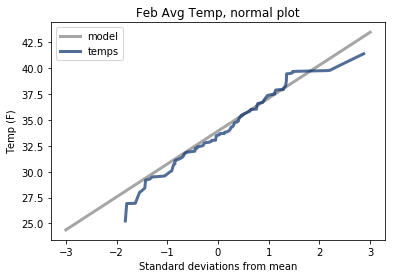

In [57]:
MakeNormalPlot(temp.feb_avg)
thinkplot.Config(title='Feb Avg Temp, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

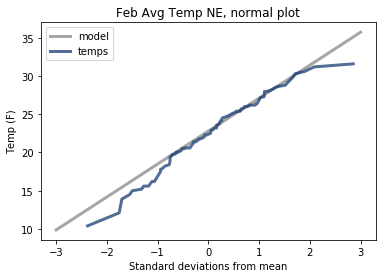

In [58]:
MakeNormalPlot(temp.feb_avg_ne)
thinkplot.Config(title='Feb Avg Temp NE, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

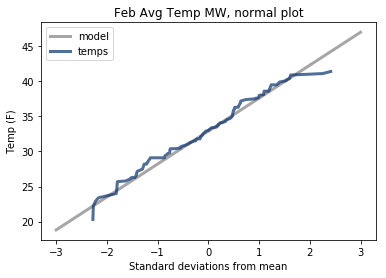

In [59]:
MakeNormalPlot(temp.feb_avg_mw)
thinkplot.Config(title='Feb Avg Temp MW, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

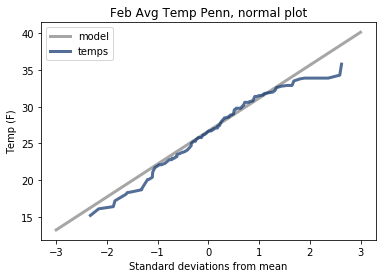

In [60]:
MakeNormalPlot(temp.feb_avg_pn)
thinkplot.Config(title='Feb Avg Temp Penn, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

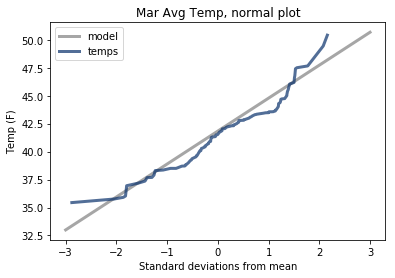

In [61]:
MakeNormalPlot(temp.mar_avg)
thinkplot.Config(title='Mar Avg Temp, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

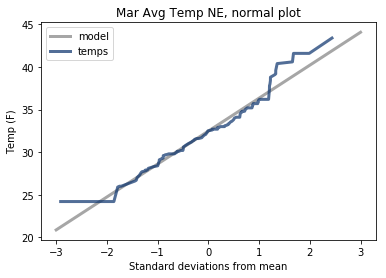

In [62]:
MakeNormalPlot(temp.mar_avg_ne)
thinkplot.Config(title='Mar Avg Temp NE, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

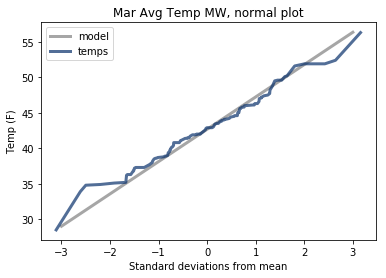

In [63]:
MakeNormalPlot(temp.mar_avg_mw)
thinkplot.Config(title='Mar Avg Temp MW, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

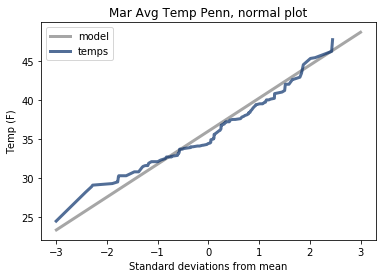

In [64]:
MakeNormalPlot(temp.mar_avg_pn)
thinkplot.Config(title='Mar Avg Temp Penn, normal plot', xlabel= 'Standard deviations from mean',
                 ylabel='Temp (F)', loc='upper left')

In [65]:
# Create a scatterplot function
def ScatterPlot(temp, result):
    """Make a scatter plot and save it.
    result: shadow or no shadow
    temp: average temperature
    """
    thinkplot.Scatter(temp, result)
    thinkplot.Config(xlabel='Average Temperature',
                     ylabel='Groundhog Shadow Result')

In [66]:
# Create a correlations function
def Correlations(result, temp):
    """Calculate and print correlations given two variables
    result: shadow or no shadow
    temp: average temperature
    """
    print('pandas cov', result.cov(temp))
    print('NumPy cov', np.cov(result, temp, ddof=0))
    print('thinkstats2 Cov', thinkstats2.Cov(result, temp))
    print()

    print('pandas corr', result.corr(temp))
    print('NumPy corrcoef', np.corrcoef(result, temp, ddof=0))
    print('thinkstats2 Corr', thinkstats2.Corr(result, temp))
    print()

    print('pandas corr spearman', result.corr(temp, method='spearman'))
    print('thinkstats2 SpearmanCorr', 
          thinkstats2.SpearmanCorr(result, temp))
    print('thinkstats2 SpearmanCorr log temp', 
          thinkstats2.SpearmanCorr(result, np.log(temp)))
    print()

    print('thinkstats2 Corr log temp',
          thinkstats2.Corr(result, np.log(temp)))
    print()

pandas cov -0.2152038980509745
NumPy cov [[ 0.11258918 -0.21334869]
 [-0.21334869 10.06960158]]
thinkstats2 Cov -0.21334869203329357

pandas corr -0.20037129910327792
NumPy corrcoef [[ 1.        -0.2003713]
 [-0.2003713  1.       ]]
thinkstats2 Corr -0.20037129910327783

pandas corr spearman -0.2117669666555492
thinkstats2 SpearmanCorr -0.21176696665554917
thinkstats2 SpearmanCorr log temp -0.21176696665554917

thinkstats2 Corr log temp -0.20392884086713708



C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


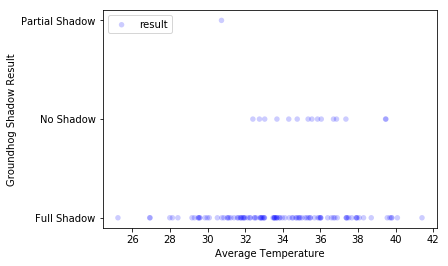

In [67]:
# February average temperatures
ScatterPlot(temp.feb_avg, temp.result)
Correlations(temp.result_num, temp.feb_avg)

pandas cov -0.0892278860569716
NumPy cov [[ 0.11258918 -0.08845868]
 [-0.08845868 18.42904504]]
thinkstats2 Cov -0.08845868014268736

pandas corr -0.061410228350036865
NumPy corrcoef [[ 1.         -0.06141023]
 [-0.06141023  1.        ]]
thinkstats2 Corr -0.06141022835003686

pandas corr spearman -0.09284914684019853
thinkstats2 SpearmanCorr -0.09284914684019853
thinkstats2 SpearmanCorr log temp -0.09284914684019853

thinkstats2 Corr log temp -0.04417816499498667



C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


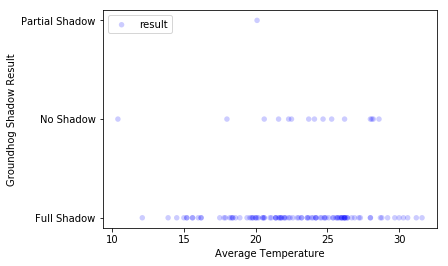

In [68]:
# February average temperatures in the Northeast
ScatterPlot(temp.feb_avg_ne, temp.result)
Correlations(temp.result_num, temp.feb_avg_ne)

pandas cov -0.12322338830584707
NumPy cov [[ 0.11258918 -0.12216112]
 [-0.12216112 21.86027051]]
thinkstats2 Cov -0.12216111771700354

pandas corr -0.07786762066675901
NumPy corrcoef [[ 1.         -0.07786762]
 [-0.07786762  1.        ]]
thinkstats2 Corr -0.07786762066675901

pandas corr spearman -0.08056940514104802
thinkstats2 SpearmanCorr -0.080569405141048
thinkstats2 SpearmanCorr log temp -0.080569405141048

thinkstats2 Corr log temp -0.08362480380886611



C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


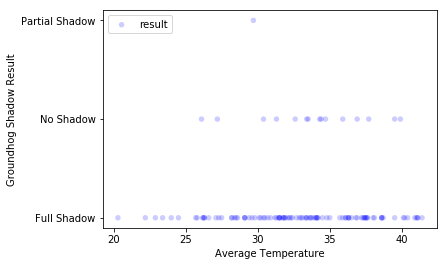

In [69]:
# February average temperatures in the Midwest
ScatterPlot(temp.feb_avg_mw, temp.result)
Correlations(temp.result_num, temp.feb_avg_mw)

C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


pandas cov -0.07907796101949024
NumPy cov [[ 0.11258918 -0.07839625]
 [-0.07839625 19.94905693]]
thinkstats2 Cov -0.07839625445897741

pandas corr -0.05231013030609308
NumPy corrcoef [[ 1.         -0.05231013]
 [-0.05231013  1.        ]]
thinkstats2 Corr -0.052310130306093085

pandas corr spearman -0.08018635792833645
thinkstats2 SpearmanCorr -0.08018635792833645
thinkstats2 SpearmanCorr log temp -0.08018635792833645

thinkstats2 Corr log temp -0.04291414495987875



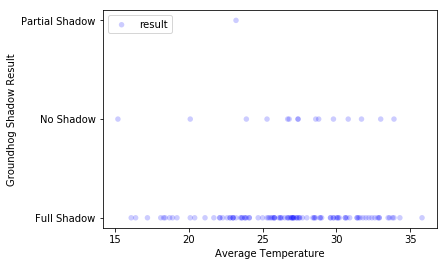

In [70]:
# February average temperatures in Pennsylvania
ScatterPlot(temp.feb_avg_pn, temp.result)
Correlations(temp.result_num, temp.feb_avg_pn)

pandas cov -0.14761169415292352
NumPy cov [[ 0.11258918 -0.14633918]
 [-0.14633918  8.60312452]]
thinkstats2 Cov -0.14633917954815698

pandas corr -0.14869082944818382
NumPy corrcoef [[ 1.         -0.14869083]
 [-0.14869083  1.        ]]
thinkstats2 Corr -0.1486908294481839

pandas corr spearman -0.1438639814990308
thinkstats2 SpearmanCorr -0.1438639814990308
thinkstats2 SpearmanCorr log temp -0.1438639814990308

thinkstats2 Corr log temp -0.14815700408479882



C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


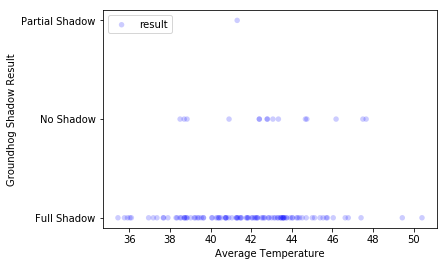

In [71]:
# March average temperatures
ScatterPlot(temp.mar_avg, temp.result)
Correlations(temp.result_num, temp.mar_avg)

pandas cov -0.06413043478260884
NumPy cov [[ 0.11258918 -0.06357759]
 [-0.06357759 14.83721983]]
thinkstats2 Cov -0.06357758620689664

pandas corr -0.04919029675984465


C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


NumPy corrcoef [[ 1.        -0.0491903]
 [-0.0491903  1.       ]]
thinkstats2 Corr -0.04919029675984462

pandas corr spearman -0.06906466849221912
thinkstats2 SpearmanCorr -0.06906466849221914
thinkstats2 SpearmanCorr log temp -0.06906466849221914

thinkstats2 Corr log temp -0.058981626784619566



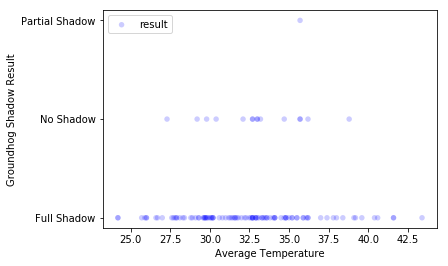

In [72]:
# March average temperatures in the Northeast
ScatterPlot(temp.mar_avg_ne, temp.result)
Correlations(temp.result_num, temp.mar_avg_ne)

pandas cov -0.04452023988006
NumPy cov [[ 0.11258918 -0.04413644]
 [-0.04413644 20.56556109]]
thinkstats2 Cov -0.04413644470868013

pandas corr -0.02900539193370638
NumPy corrcoef [[ 1.         -0.02900539]
 [-0.02900539  1.        ]]
thinkstats2 Corr -0.029005391933706354

pandas corr spearman -0.030693283740355785
thinkstats2 SpearmanCorr -0.030693283740355775
thinkstats2 SpearmanCorr log temp -0.030693283740355775

thinkstats2 Corr log temp -0.0335612916890956



C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


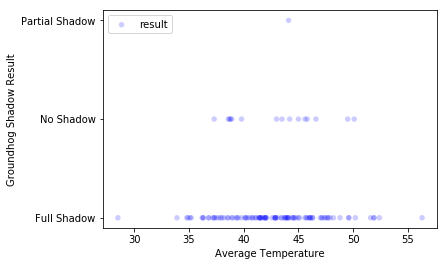

In [73]:
# March average temperatures in the Midwest
ScatterPlot(temp.mar_avg_mw, temp.result)
Correlations(temp.result_num, temp.mar_avg_mw)

pandas cov -0.040277361319340434
NumPy cov [[ 0.11258918 -0.03993014]
 [-0.03993014 17.59392613]]
thinkstats2 Cov -0.039930142687277154

pandas corr -0.02837077195007669
NumPy corrcoef [[ 1.         -0.02837077]
 [-0.02837077  1.        ]]
thinkstats2 Corr -0.02837077195007669

pandas corr spearman -0.03990103873651902
thinkstats2 SpearmanCorr -0.03990103873651901


C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


thinkstats2 SpearmanCorr log temp -0.03990103873651901

thinkstats2 Corr log temp -0.035855175973268476



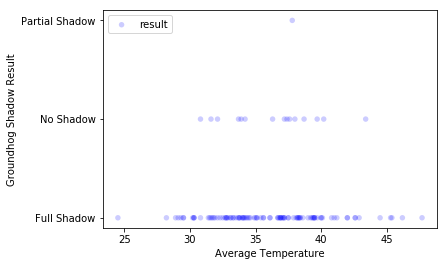

In [74]:
# March average temperatures in Pennsylvania
ScatterPlot(temp.mar_avg_pn, temp.result)
Correlations(temp.result_num, temp.mar_avg_pn)

In [75]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.
        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.
        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [76]:
# Create functions for hypothesis tests

#Compare monthly temps
def hyptest(temp1, temp2):
    data = temp1.values, temp2.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=1000)
    print(p1)



In [77]:
hyptest(shadow.feb_avg, no_shadow.feb_avg)

0.03


In [78]:
hyptest(shadow.feb_avg_ne, no_shadow.feb_avg_ne)

0.513


In [79]:
hyptest(shadow.feb_avg_mw, no_shadow.feb_avg_mw)

0.395


In [80]:
hyptest(shadow.feb_avg_pn, no_shadow.feb_avg_pn)

0.559


In [81]:
hyptest(shadow.mar_avg, no_shadow.mar_avg)

0.102


In [82]:
hyptest(shadow.mar_avg_ne, no_shadow.mar_avg_ne)

0.606


In [83]:
hyptest(shadow.mar_avg_mw, no_shadow.mar_avg_mw)

0.758


In [84]:
hyptest(shadow.mar_avg_pn, no_shadow.mar_avg_pn)

0.783


In [85]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.
        data: tuple of xs and ys
        """
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.
        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [86]:
#Test correlation of results to feb avg temp

temp2 = temp[['result_num', 'feb_avg']]
data = temp2.result_num.values, temp2.feb_avg.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)

0.027


In [87]:
#Test correlation of results to feb avg ne temp

temp2 = temp[['result_num', 'feb_avg_ne']]
data = temp2.result_num.values, temp2.feb_avg_ne.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)


0.507


In [88]:
#Test correlation of results to feb avg mw temp

temp2 = temp[['result_num', 'feb_avg_mw']]
data = temp2.result_num.values, temp2.feb_avg_mw.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)


0.41


In [89]:
#Test correlation of results to feb avg pn temp

temp2 = temp[['result_num', 'feb_avg_pn']]
data = temp2.result_num.values, temp2.feb_avg_pn.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)


0.573


In [90]:
#Test correlation of results to mar avg temp

temp2 = temp[['result_num', 'mar_avg']]
data = temp2.result_num.values, temp2.mar_avg.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)

0.115


In [91]:
#Test correlation of results to mar avg ne temp

temp2 = temp[['result_num', 'mar_avg_ne']]
data = temp2.result_num.values, temp2.mar_avg_ne.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)

0.622


In [92]:
#Test correlation of results to mar avg mw temp

temp2 = temp[['result_num', 'mar_avg_mw']]
data = temp2.result_num.values, temp2.mar_avg_mw.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)

0.757


In [93]:
#Test correlation of results to mar avg pn temp

temp2 = temp[['result_num', 'mar_avg_pn']]
data = temp2.result_num.values, temp2.mar_avg_pn.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)
print(p3)

0.77


In [94]:
# Regression model for feb avg temp in pn as a function of the groundhog's shadow


formula = 'temp.feb_avg_pn ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.feb_avg_pn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3128
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.577
Time:                        18:48:03   Log-Likelihood:                -338.04
No. Observations:                 116   AIC:                             680.1
Df Residuals:                     114   BIC:                             685.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.2933      1.162     23.494      0.000      24.992      29.595
temp.result_num    -0.6963      1.245     -0.559      0.577      -3.163       1.770
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                3.132
Skew:                          -0.383   Prob(JB):                        0.209
Kurtosis:                       2.752   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Regression model for mar avg temp in pn as a function of the groundhog's shadow

formula = 'temp.mar_avg_pn ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.mar_avg_pn   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.09183
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.762
Time:                        18:48:03   Log-Likelihood:                -330.87
No. Observations:                 116   AIC:                             665.7
Df Residuals:                     114   BIC:                             671.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.3200      1.092     33.259      0.000      34.157      38.483
temp.result_num    -0.3547      1.170     -0.303      0.762      -2.673       1.964
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.211
Skew:                           0.250   Prob(JB):                        0.546
Kurtosis:                       3.021   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Regression model for feb avg temp in ne as a function of the groundhog's shadow

formula = 'temp.feb_avg_ne ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.feb_avg_ne   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4315
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.513
Time:                        18:48:03   Log-Likelihood:                -333.39
No. Observations:                 116   AIC:                             670.8
Df Residuals:                     114   BIC:                             676.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.4867      1.116     21.046      0.000      21.276      25.697
temp.result_num    -0.7857      1.196     -0.657      0.513      -3.155       1.584
==============================================================================
Omnibus:                        2.782   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.640
Skew:                          -0.368   Prob(JB):                        0.267
Kurtosis:                       2.926   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Regression model for mar avg temp in ne as a function of the groundhog's shadow

formula = 'temp.mar_avg_ne ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.mar_avg_ne   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2765
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.600
Time:                        18:48:03   Log-Likelihood:                -320.89
No. Observations:                 116   AIC:                             645.8
Df Residuals:                     114   BIC:                             651.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.9667      1.002     32.900      0.000      30.982      34.952
temp.result_num    -0.5647      1.074     -0.526      0.600      -2.692       1.563
==============================================================================
Omnibus:                        2.640   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.380
Skew:                           0.351   Prob(JB):                        0.304
Kurtosis:                       3.013   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Regression model for feb avg temp in mw as a function of the groundhog's shadow

formula = 'temp.feb_avg_mw ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.feb_avg_mw   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6954
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.406
Time:                        18:48:04   Log-Likelihood:                -343.16
No. Observations:                 116   AIC:                             690.3
Df Residuals:                     114   BIC:                             695.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.8533      1.214     27.885      0.000      31.448      36.258
temp.result_num    -1.0850      1.301     -0.834      0.406      -3.662       1.492
==============================================================================
Omnibus:                        2.377   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.200
Skew:                          -0.249   Prob(JB):                        0.333
Kurtosis:                       2.546   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Regression model for mar avg temp in mw as a function of the groundhog's shadow

formula = 'temp.mar_avg_mw ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        temp.mar_avg_mw   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.09599
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.757
Time:                        18:48:04   Log-Likelihood:                -339.92
No. Observations:                 116   AIC:                             683.8
Df Residuals:                     114   BIC:                             689.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.0267      1.181     36.443      0.000      40.688      45.366
temp.result_num    -0.3920      1.265     -0.310      0.757      -2.899       2.114
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.569
Skew:                           0.084   Prob(JB):                        0.752
Kurtosis:                       3.299   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Regression model for feb avg temp as a function of the groundhog's shadow

formula = 'temp.feb_avg ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           temp.feb_avg   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.768
Date:                Tue, 28 May 2019   Prob (F-statistic):             0.0310
Time:                        18:48:04   Log-Likelihood:                -296.17
No. Observations:                 116   AIC:                             596.3
Df Residuals:                     114   BIC:                             601.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.5780      0.810     43.938      0.000      33.974      37.182
temp.result_num    -1.8949      0.868     -2.184      0.031      -3.614      -0.176
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.176
Skew:                           0.030   Prob(JB):                        0.916
Kurtosis:                       2.819   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Regression model for mar avg temp as a function of the groundhog's shadow

formula = 'temp.mar_avg ~ temp.result_num'
model = smf.ols(formula, data = temp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           temp.mar_avg   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.577
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.111
Time:                        18:48:04   Log-Likelihood:                -288.12
No. Observations:                 116   AIC:                             580.2
Df Residuals:                     114   BIC:                             585.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.9660      0.755     56.875      0.000      41.469      44.463
temp.result_num    -1.2998      0.810     -1.605      0.111      -2.904       0.304
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.392
Skew:                           0.142   Prob(JB):                        0.822
Kurtosis:                       3.031   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""